In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

import pandas as pd



# Forecasting future sales for Rossmann Pharmaceuticals across various stores

## Using machine learning and deep learning techniques

#### Load train, test and store dataset for EDA analysis

In [2]:
train_data_path = 'docs/train.csv'
test_data_path ='docs/test.csv'
store_data_path ='docs/store.csv'


In [3]:
from scripts.data_loder import load_data


In [4]:
train_data, test_data, store_data = load_data(train_data_path,test_data_path,store_data_path)


2024-09-20 11:56:07,186 - INFO - Loading data from file...
2024-09-20 11:56:07,710 - INFO - Train Data, Test Data and Store Data loaded with shape (1017209, 9), (41088, 8), and (1115, 10) respectively


### Verify the loaded datasets

#### Train Dataset

In [5]:
train_data.head(10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [6]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Test Dataset

In [7]:
test_data.head(10)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [8]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


#### Store Dataset

In [9]:
store_data.head(10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [10]:
store_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Cleaning the data

The data cleaning process will involve building pipelines to detect and handle outliers and missing data. This is particularly important because you don’t want to skew our analysis. 


## Exploratory Data Analysis (EDA)

#### Check missing value

In [11]:
from scripts.preprocessing import find_missing_values


#### Find missing values of Train Dataset

In [12]:
find_missing_values(train_data)


2024-09-20 11:56:08,682 - INFO - Finding missing values in DataFrame...
2024-09-20 11:56:08,682 - INFO - Finding missing values in DataFrame...


From 9 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


#### Find Missing Values of Test Dataset

In [13]:
find_missing_values(test_data)


2024-09-20 11:56:08,781 - INFO - Finding missing values in DataFrame...
2024-09-20 11:56:08,781 - INFO - Finding missing values in DataFrame...


From 8 columns selected, there are 1 columns with missing values.


,Missing values,Percent of Total Values,DataType
Open,11,0.0,float64


#### Find missing values of Store Dataset

In [14]:
find_missing_values(store_data)


2024-09-20 11:56:08,802 - INFO - Finding missing values in DataFrame...
2024-09-20 11:56:08,802 - INFO - Finding missing values in DataFrame...


From 10 columns selected, there are 6 columns with missing values.


,Missing values,Percent of Total Values,DataType
Promo2SinceWeek,544,48.8,float64
Promo2SinceYear,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


## Handling missing values

In [15]:
from scripts.preprocessing import replace_missing_values


Our Training data have no missing value and Test data have one missing value

In [16]:
test_data=replace_missing_values(test_data)


2024-09-20 11:56:08,834 - INFO - Replacing missing values...
2024-09-20 11:56:08,834 - INFO - Replacing missing values...
2024-09-20 11:56:08,839 - INFO - Replacing missing values in column 'Id' with mean: 20544.5
2024-09-20 11:56:08,839 - INFO - Replacing missing values in column 'Id' with mean: 20544.5
2024-09-20 11:56:08,841 - INFO - Replacing missing values in column 'Store' with mean: 555.8995327102804
2024-09-20 11:56:08,841 - INFO - Replacing missing values in column 'Store' with mean: 555.8995327102804
2024-09-20 11:56:08,843 - INFO - Replacing missing values in column 'DayOfWeek' with mean: 3.9791666666666665
2024-09-20 11:56:08,843 - INFO - Replacing missing values in column 'DayOfWeek' with mean: 3.9791666666666665
2024-09-20 11:56:08,845 - INFO - Replacing missing values in column 'Open' with mean: 0.8543223701828274
2024-09-20 11:56:08,845 - INFO - Replacing missing values in column 'Open' with mean: 0.8543223701828274
2024-09-20 11:56:08,848 - INFO - Replacing missing val

In [17]:
find_missing_values(test_data)


2024-09-20 11:56:08,876 - INFO - Finding missing values in DataFrame...
2024-09-20 11:56:08,876 - INFO - Finding missing values in DataFrame...


From 8 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


In [18]:
store_data=replace_missing_values(store_data)


2024-09-20 11:56:08,894 - INFO - Replacing missing values...
2024-09-20 11:56:08,894 - INFO - Replacing missing values...
2024-09-20 11:56:08,896 - INFO - Replacing missing values in column 'Store' with mean: 558.0
2024-09-20 11:56:08,896 - INFO - Replacing missing values in column 'Store' with mean: 558.0
2024-09-20 11:56:08,899 - INFO - Replacing missing values in column 'CompetitionDistance' with mean: 5404.901079136691
2024-09-20 11:56:08,899 - INFO - Replacing missing values in column 'CompetitionDistance' with mean: 5404.901079136691
2024-09-20 11:56:08,902 - INFO - Replacing missing values in column 'CompetitionOpenSinceMonth' with mean: 7.2247043363994745
2024-09-20 11:56:08,902 - INFO - Replacing missing values in column 'CompetitionOpenSinceMonth' with mean: 7.2247043363994745
2024-09-20 11:56:08,904 - INFO - Replacing missing values in column 'CompetitionOpenSinceYear' with mean: 2008.6688567674114
2024-09-20 11:56:08,904 - INFO - Replacing missing values in column 'Competit

In [19]:
find_missing_values(store_data)


2024-09-20 11:56:08,924 - INFO - Finding missing values in DataFrame...
2024-09-20 11:56:08,924 - INFO - Finding missing values in DataFrame...


From 10 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


In [20]:
store_data.head(10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
5,6,a,a,310.0,12.0,2013.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
6,7,a,c,24000.0,4.0,2013.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
7,8,a,a,7520.0,10.0,2014.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
8,9,a,c,2030.0,8.0,2000.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"
9,10,a,a,3160.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct"


### Check Outlier

In [21]:
from scripts.preprocessing import get_outlier_summary


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


#### Detect outlier for train_data

In [23]:
get_outlier_summary(train_data,['Sales','Customers'])


2024-09-20 11:56:09,052 - INFO - Calculating outlier summary for numerical columns...
2024-09-20 11:56:09,052 - INFO - Calculating outlier summary for numerical columns...


From 9 selected numerical columns, there are 2 columns with outlier values.


,Variable,Number of Outliers
0,Sales,26694
1,Customers,38095


### Plot outliers detected in the training data.

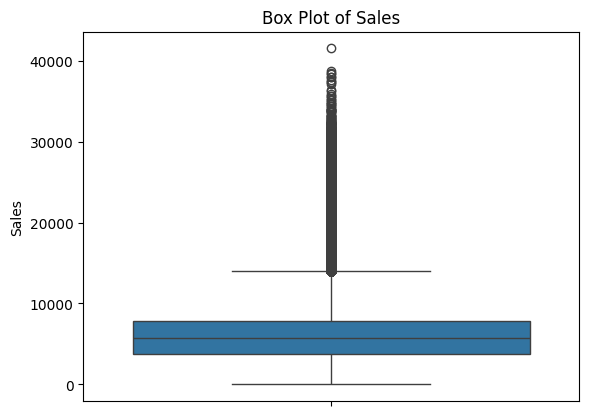

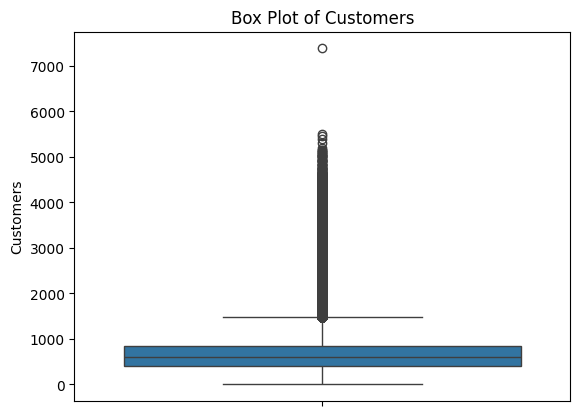

In [24]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(train_data,['Sales','Customers'])


#### Detect outlier for Test Data

In [25]:
get_outlier_summary(test_data,['Id','Store','DayOfWeek'])


2024-09-20 11:56:12,111 - INFO - Calculating outlier summary for numerical columns...
2024-09-20 11:56:12,111 - INFO - Calculating outlier summary for numerical columns...


From 8 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Id,0
1,Store,0
2,DayOfWeek,0


#### Detect outlier for Store data


In [26]:
get_outlier_summary(store_data,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'])


2024-09-20 11:56:12,134 - INFO - Calculating outlier summary for numerical columns...
2024-09-20 11:56:12,134 - INFO - Calculating outlier summary for numerical columns...


From 10 selected numerical columns, there are 5 columns with outlier values.


,Variable,Number of Outliers
0,CompetitionDistance,108
1,CompetitionOpenSinceMonth,14
2,CompetitionOpenSinceYear,92
3,Promo2SinceWeek,533
4,Promo2SinceYear,490


### Plot outliers detected in the store data.


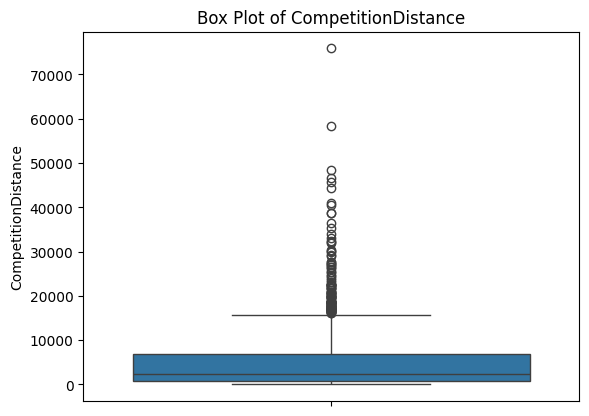

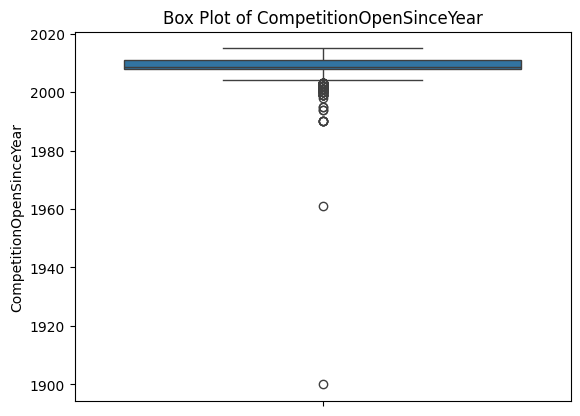

In [27]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


## Remove Outliers

In [28]:
from scripts.preprocessing import remove_outliers_winsorization


In [29]:
train_data = remove_outliers_winsorization(train_data,['Sales','Customers'])


2024-09-20 11:56:12,455 - INFO - Removing outliers using winsorization...
2024-09-20 11:56:12,455 - INFO - Removing outliers using winsorization...
2024-09-20 11:56:12,485 - INFO - Winsorizing column 'Sales' with lower bound: -2466.5 and upper bound: 14049.5
2024-09-20 11:56:12,485 - INFO - Winsorizing column 'Sales' with lower bound: -2466.5 and upper bound: 14049.5
2024-09-20 11:56:12,543 - INFO - Winsorizing column 'Customers' with lower bound: -243.0 and upper bound: 1485.0
2024-09-20 11:56:12,543 - INFO - Winsorizing column 'Customers' with lower bound: -243.0 and upper bound: 1485.0


In [30]:

store_data = remove_outliers_winsorization(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


2024-09-20 11:56:12,596 - INFO - Removing outliers using winsorization...
2024-09-20 11:56:12,596 - INFO - Removing outliers using winsorization...
2024-09-20 11:56:12,601 - INFO - Winsorizing column 'CompetitionDistance' with lower bound: -8512.5 and upper bound: 16107.5
2024-09-20 11:56:12,601 - INFO - Winsorizing column 'CompetitionDistance' with lower bound: -8512.5 and upper bound: 16107.5
2024-09-20 11:56:12,604 - INFO - Winsorizing column 'CompetitionOpenSinceYear' with lower bound: 2003.5 and upper bound: 2015.5
2024-09-20 11:56:12,604 - INFO - Winsorizing column 'CompetitionOpenSinceYear' with lower bound: 2003.5 and upper bound: 2015.5


### Verify if outliers were removed

#### For Training Data

In [31]:
get_outlier_summary(train_data,['Sales','Customers'])



2024-09-20 11:56:12,619 - INFO - Calculating outlier summary for numerical columns...
2024-09-20 11:56:12,619 - INFO - Calculating outlier summary for numerical columns...


From 9 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Sales,0
1,Customers,0


#### For Test Data

In [32]:
get_outlier_summary(test_data,['Id','Store','DayOfWeek'])


2024-09-20 11:56:12,697 - INFO - Calculating outlier summary for numerical columns...
2024-09-20 11:56:12,697 - INFO - Calculating outlier summary for numerical columns...


From 8 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Id,0
1,Store,0
2,DayOfWeek,0


#### For Store Data

In [33]:
get_outlier_summary(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


2024-09-20 11:56:12,727 - INFO - Calculating outlier summary for numerical columns...
2024-09-20 11:56:12,727 - INFO - Calculating outlier summary for numerical columns...


From 10 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,CompetitionDistance,0
1,CompetitionOpenSinceYear,0


### Box-Plot After Removing Outlier

#### For Training Data

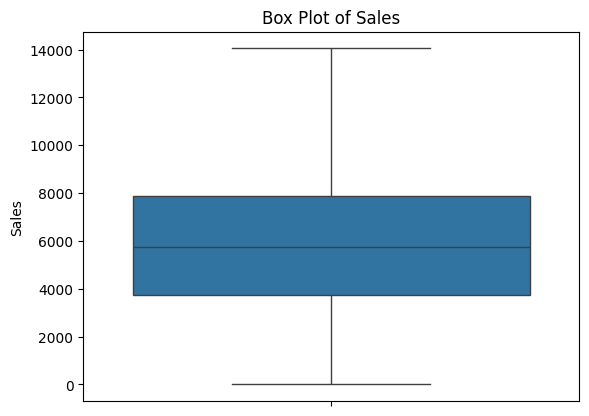

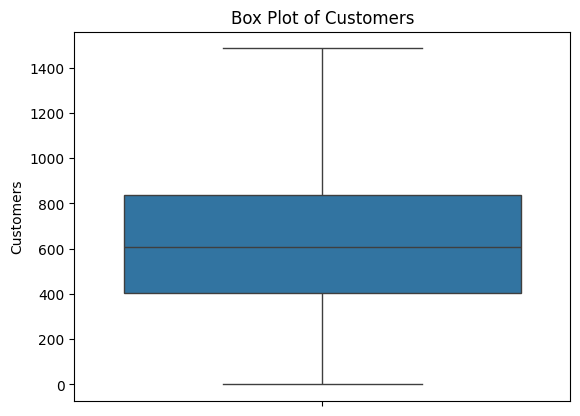

In [34]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(train_data,['Sales','Customers'])



#### For Store Date

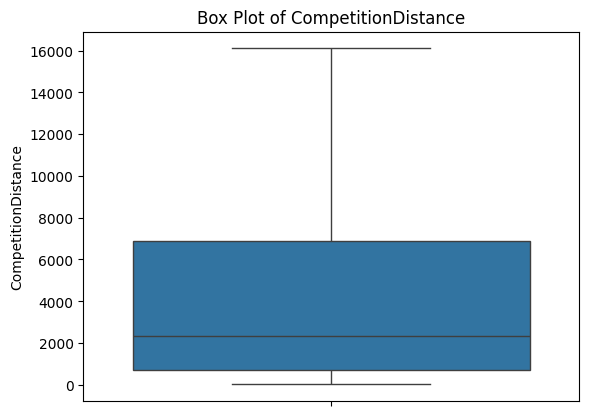

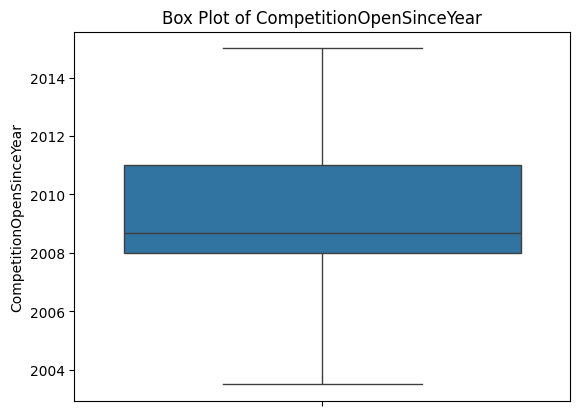

In [35]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


# Merge Training And Store Dataset


In [36]:

merged_train_data_store = pd.merge(train_data, store_data, on='Store', how='inner')


In [37]:
def replace_char_holiday(char):
    if char == 'a':
        return 'Public Holiday'
    elif char == 'b':
        return 'Easter holiday'
    elif char == 'c':
        return 'Christmas'
    else:
        return char


In [38]:
merged_train_data_store['StateHoliday'] = merged_train_data_store['StateHoliday'].apply(replace_char_holiday)


assortment level a = basic, b = extra, c = extended

In [39]:
merged_train_data_store['Assortment'].value_counts()


Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64

In [40]:
def replace_char(char):
    if char == 'a':
        return 'basic'
    elif char == 'b':
        return 'extra'
    elif char == 'c':
        return 'extended'
    else:
        return char


In [41]:
merged_train_data_store['Assortment'] = merged_train_data_store['Assortment'].apply(replace_char)


In [42]:
merged_train_data_store['Date'] = pd.to_datetime(merged_train_data_store['Date'])


In [43]:
def split_date(data):
    data['Day'] = data['Date'].dt.day
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year


In [44]:
split_date(merged_train_data_store)


In [45]:
merged_train_data_store.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

2024-09-20 11:56:17,745 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 11:56:17,745 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 11:56:17,751 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 11:56:17,751 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 11:56:17,784 - INFO - Using categorical units to plot a list of strings that are all parsable as 

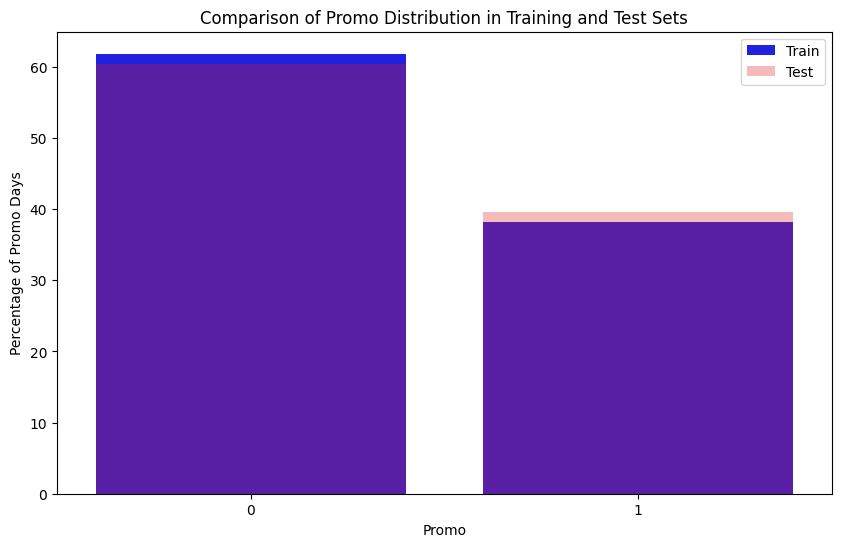

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check the distribution of promotions in both datasets
train_promo_dist = train_data['Promo'].value_counts(normalize=True) * 100
test_promo_dist = test_data['Promo'].value_counts(normalize=True) * 100

# Create a DataFrame to compare the distributions
promo_comparison = pd.DataFrame({
    'Train': train_promo_dist,
    'Test': test_promo_dist
}).transpose()

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.barplot(x=promo_comparison.columns, y=promo_comparison.loc['Train'], color='blue', label='Train')
sns.barplot(x=promo_comparison.columns, y=promo_comparison.loc['Test'], color='red',alpha=0.3, label='Test')

# Add labels and title
plt.title('Comparison of Promo Distribution in Training and Test Sets')
plt.ylabel('Percentage of Promo Days')
plt.legend()

plt.show()


Check & compare sales behavior before, during, and after holidays

In [47]:
holiday_map = {
    'a': 'Public Holiday',
    'b': 'Easter Holiday',
    'c': 'Christmas',
    '0': 'None'
}

train_data['StateHoliday'] = train_data['StateHoliday'].map(holiday_map)


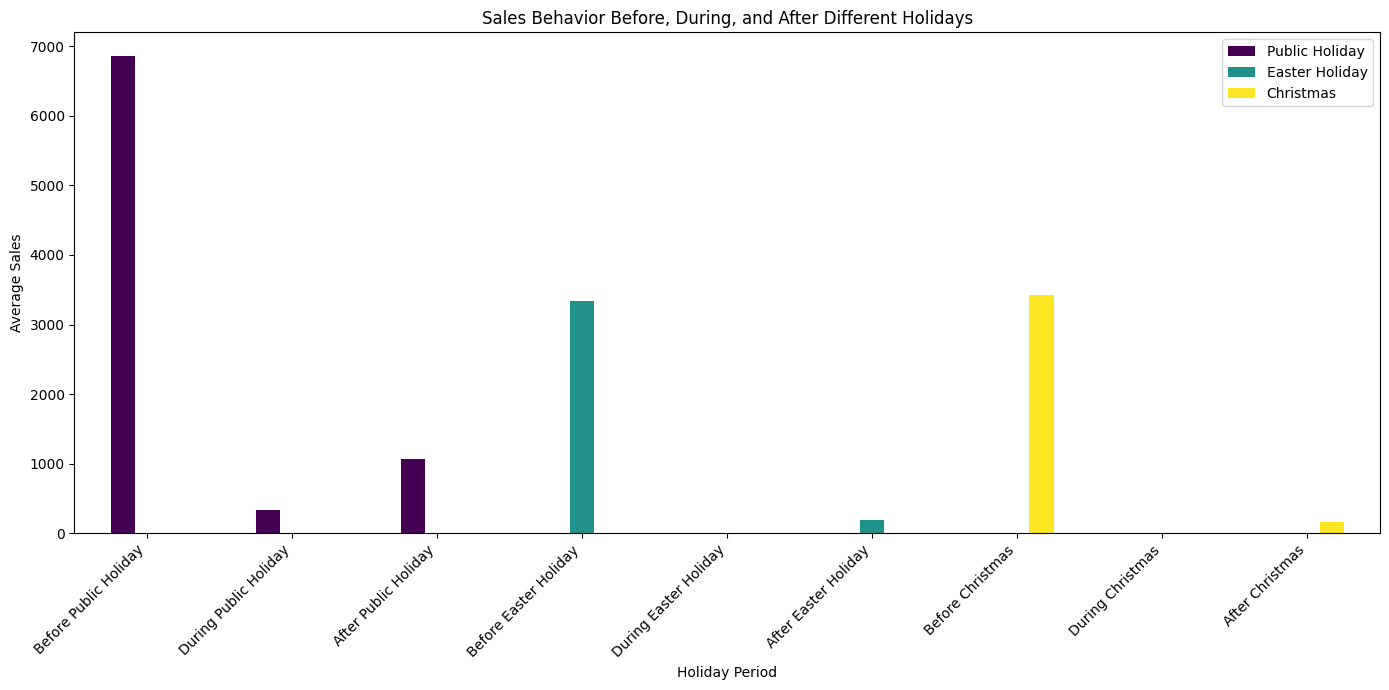

In [48]:
# Function to label the period (Before, During, After) based on holiday
def label_holiday_periods(row, holiday_type):
    if row['StateHoliday'] == holiday_type:
        return 'During ' + holiday_type
    else:
        return 'Regular'

# Categorize each day based on the holiday type
for holiday in ['Public Holiday', 'Easter Holiday', 'Christmas']:
    # Apply the holiday categorization
    train_data[f'HolidayPeriod_{holiday}'] = train_data.apply(lambda row: label_holiday_periods(row, holiday), axis=1)
    
    # Create columns to indicate "Before" and "After" holiday periods, adding checks to ensure we have data
    train_data[f'AfterHoliday_{holiday}'] = train_data[f'HolidayPeriod_{holiday}'].shift(-1) == f'During {holiday}'
    train_data[f'BeforeHoliday_{holiday}'] = train_data[f'HolidayPeriod_{holiday}'].shift(1) == f'During {holiday}'
    
    # Initialize with "Regular" and then adjust for "Before" and "After" periods
    train_data[f'SalesPeriod_{holiday}'] = 'Regular'
    train_data.loc[train_data[f'BeforeHoliday_{holiday}'], f'SalesPeriod_{holiday}'] = f'Before {holiday}'
    train_data.loc[train_data[f'HolidayPeriod_{holiday}'] == f'During {holiday}', f'SalesPeriod_{holiday}'] = f'During {holiday}'
    train_data.loc[train_data[f'AfterHoliday_{holiday}'], f'SalesPeriod_{holiday}'] = f'After {holiday}'

# Check if there are sales during holidays; if empty, no need to plot
holiday_sales_behavior = pd.DataFrame()

for holiday in ['Public Holiday', 'Easter Holiday', 'Christmas']:
    # Filter out only the relevant holiday sales periods
    filtered_sales = train_data[train_data[f'SalesPeriod_{holiday}'] != 'Regular']
    
    # Ensure there's data before proceeding with analysis
    if not filtered_sales.empty:
        # Calculate average sales during different periods (Before, During, After)
        sales_behavior = filtered_sales.groupby(f'SalesPeriod_{holiday}')['Sales'].mean()
        sales_behavior.name = holiday
        holiday_sales_behavior = pd.concat([holiday_sales_behavior, sales_behavior], axis=1)
    else:
        print(f"No data found for {holiday}, skipping...")

order = [
    'Before Public Holiday', 'During Public Holiday', 'After Public Holiday',
    'Before Easter Holiday', 'During Easter Holiday', 'After Easter Holiday',
    'Before Christmas', 'During Christmas', 'After Christmas'
]

# Reindex the holiday_sales_behavior DataFrame to follow the desired order
holiday_sales_behavior = holiday_sales_behavior.reindex(order)


# If there's any holiday data, plot the results
if not holiday_sales_behavior.empty:
    holiday_sales_behavior.plot(kind='bar', figsize=(14, 7), colormap='viridis')
    
    # Add labels and title
    plt.title('Sales Behavior Before, During, and After Different Holidays')
    plt.ylabel('Average Sales')
    plt.xlabel('Holiday Period')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    
    # Show plot
    plt.show()
else:
    print("No holiday sales data to plot.")


In [49]:
# merged_train_data_store['CompetitionDistance']['Sales']
# x=merged_train_data_store.groupby('StoreType')['CompetitionDistance'].value_counts()


In [50]:
# print(x)


In [51]:
merged_train_data_store.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",31,7,2015
1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,...,620.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",31,7,2015
4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,...,16107.5,4.0,2015.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",31,7,2015


In [52]:
merged_train_data_store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

How promotions, holidays, or store characteristics affect sales.

In [53]:
# merged_train_data_store.reset_index(inplace=True)
merged_train_data_store.set_index('Date', inplace=True)



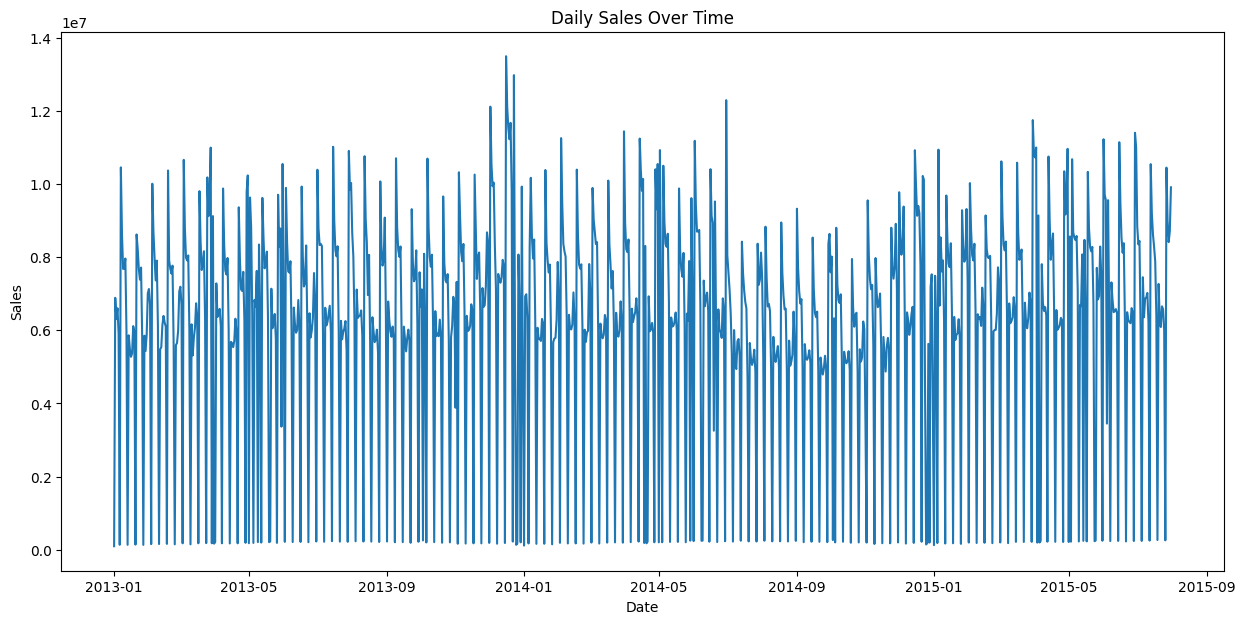

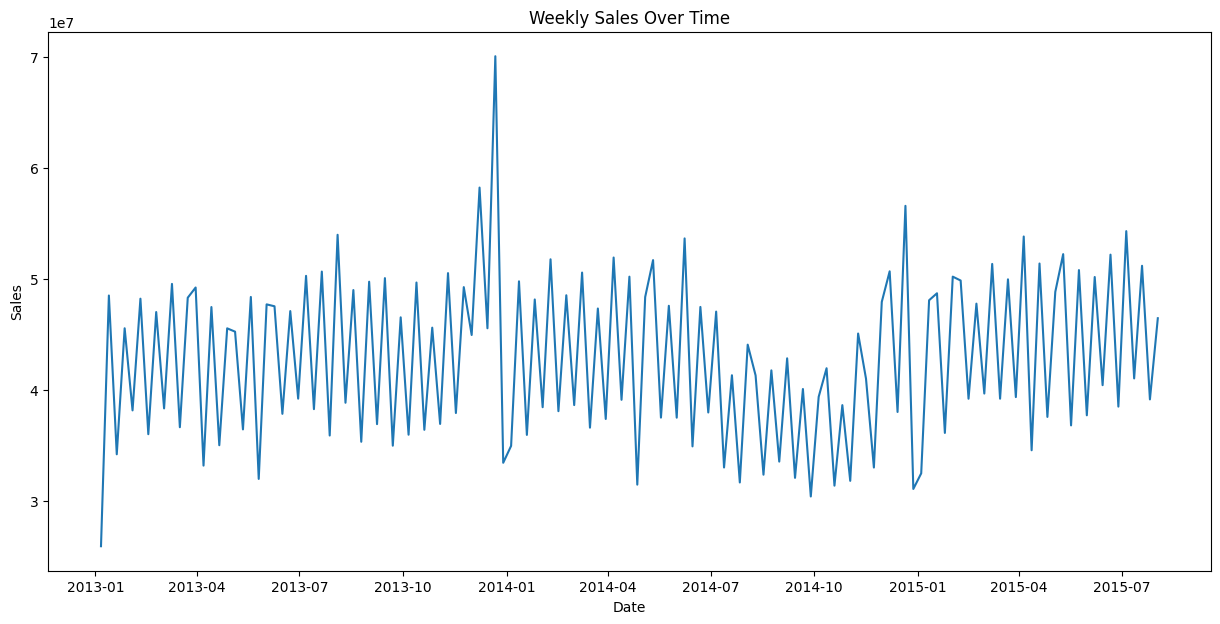

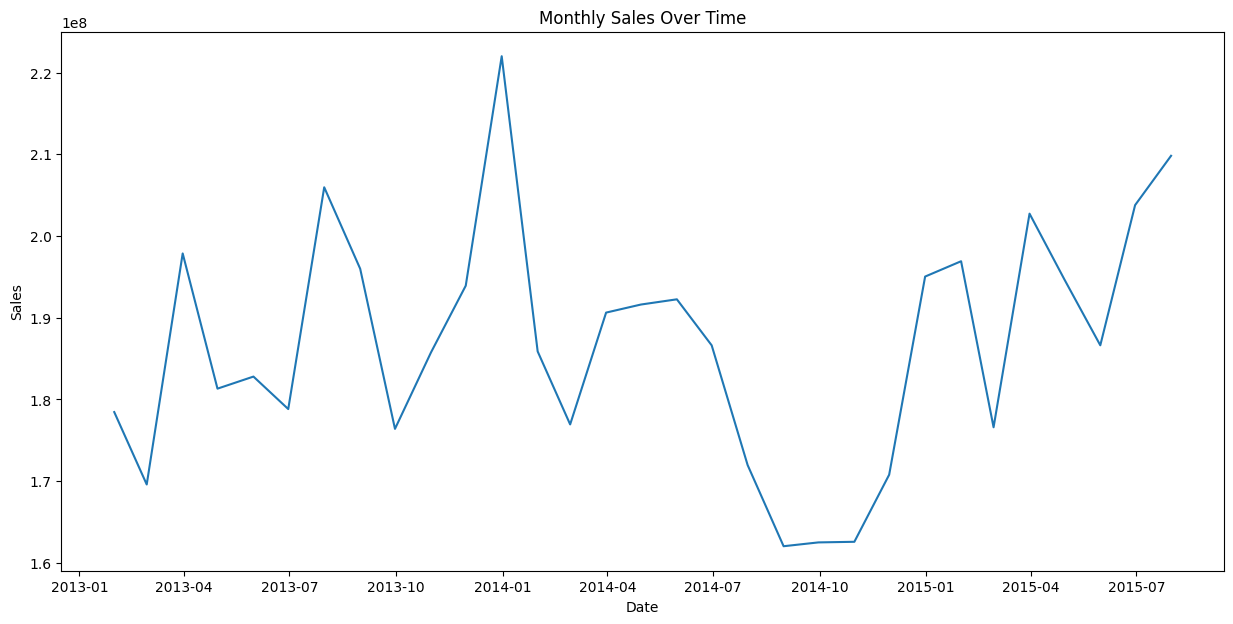

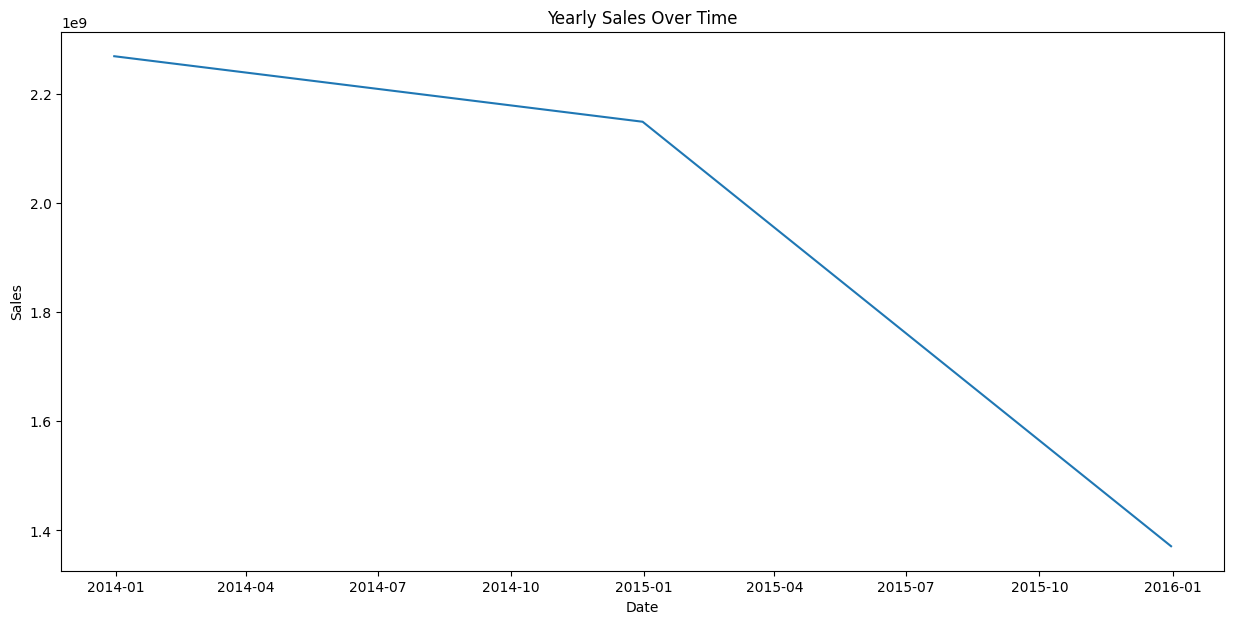

In [54]:
for column in ['D','W','M','Y']:
    over_time_sales = merged_train_data_store['Sales'].resample(column).sum()
    plt.figure(figsize=(15, 7))
    plt.plot(over_time_sales.index, over_time_sales)
    if column =='D':
        plt.title('Daily Sales Over Time')
    elif column =='W':
        plt.title('Weekly Sales Over Time')
    elif column =='M':
        plt.title('Monthly Sales Over Time')
    else:
        plt.title('Yearly Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()


### Trend: 
This component shows the long-term movement in the data. It indicates whether sales are generally increasing, decreasing, or remaining stable over time.
### Seasonal: 
This component captures the repetitive patterns or fluctuations that occur at regular intervals (e.g., monthly, quarterly). It reveals how sales vary throughout the year, highlighting any seasonal effects.
### Residual (or Irregular): 
This component represents the random noise or leftover variation after removing the trend and seasonal components. It can indicate anomalies or outliers in the data.
Overall, the results help in understanding the underlying patterns in the sales data, which can inform business decisions and forecasting efforts.

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose


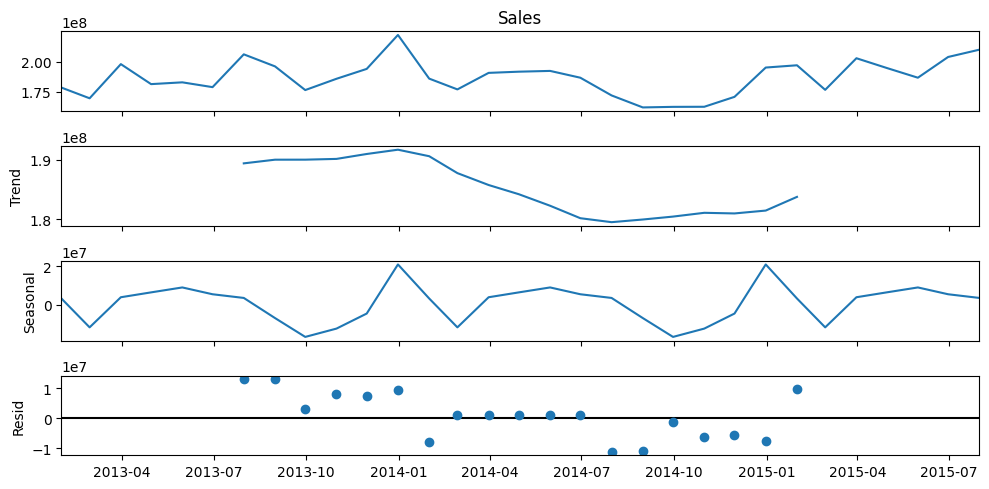

In [56]:
monthly_sales = merged_train_data_store['Sales'].resample('M').sum()
result = seasonal_decompose(monthly_sales, model='additive')
fig = result.plot()
fig.set_size_inches(10, 5)  

plt.tight_layout() 
plt.show()


### Day of week patterns

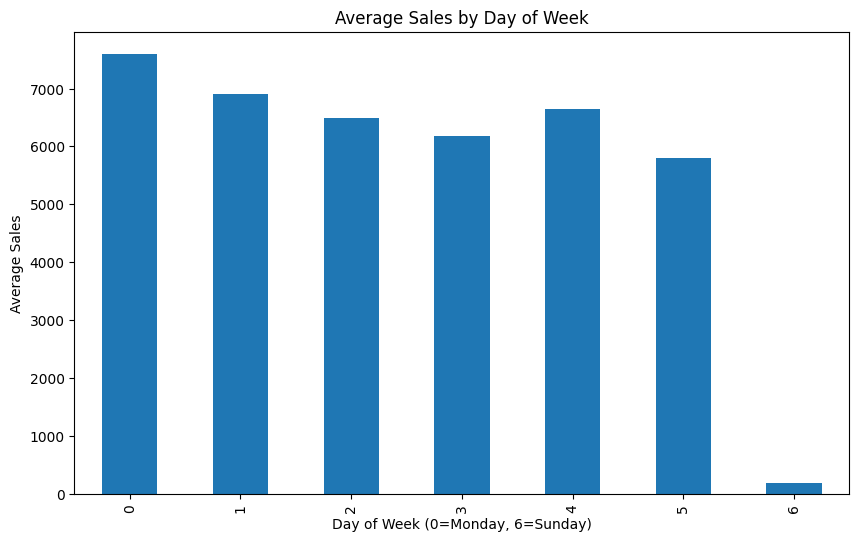

In [57]:
merged_train_data_store['DayOfWeek'] = merged_train_data_store.index.dayofweek
day_of_week_sales = merged_train_data_store.groupby('DayOfWeek')['Sales'].mean()
day_of_week_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Sales')
plt.show()


### Visualize distribution of Holiday

In [58]:
merged_train_data_store[merged_train_data_store['StateHoliday']=='0']['StateHoliday']


Date
2015-07-31    0
2015-07-31    0
2015-07-31    0
2015-07-31    0
2015-07-31    0
             ..
2013-01-02    0
2013-01-02    0
2013-01-02    0
2013-01-02    0
2013-01-02    0
Name: StateHoliday, Length: 855087, dtype: object

In [59]:
merged_train_data_store['StateHoliday'].value_counts()


StateHoliday
0                 855087
0                 131072
Public Holiday     20260
Easter holiday      6690
Christmas           4100
Name: count, dtype: int64

In [60]:
merged_train_data_store['SchoolHoliday'].value_counts()


SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

In [61]:
monthly_open_store = merged_train_data_store.groupby([merged_train_data_store.index.to_period('M'), 'Open'])['Sales'].mean().unstack()


In [62]:
monthly_open_store.head()


Open,0,1
Date,,
2013-01,0.0,6181.368250
2013-02,0.0,6355.652475
2013-03,0.0,7093.965994
2013-04,0.0,6503.426722
2013-05,0.0,6976.285875


### Trends of customer behavior during store opening and closing times


#### Sales with respect to Open and not open

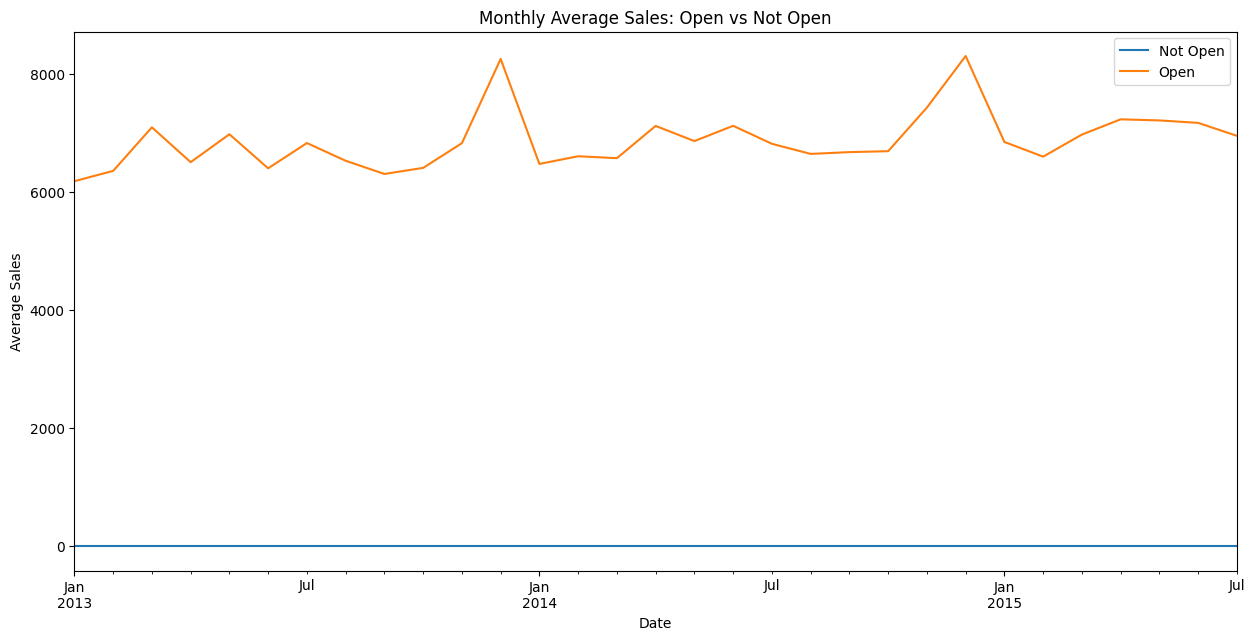

In [63]:
monthly_open_store[[0, 1]].plot(figsize=(15, 7))
plt.title('Monthly Average Sales: Open vs Not Open')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(['Not Open', 'Open'])
plt.show()


#### Trends of customer behavior during store opening and closing times


#### Customer behavior during store open

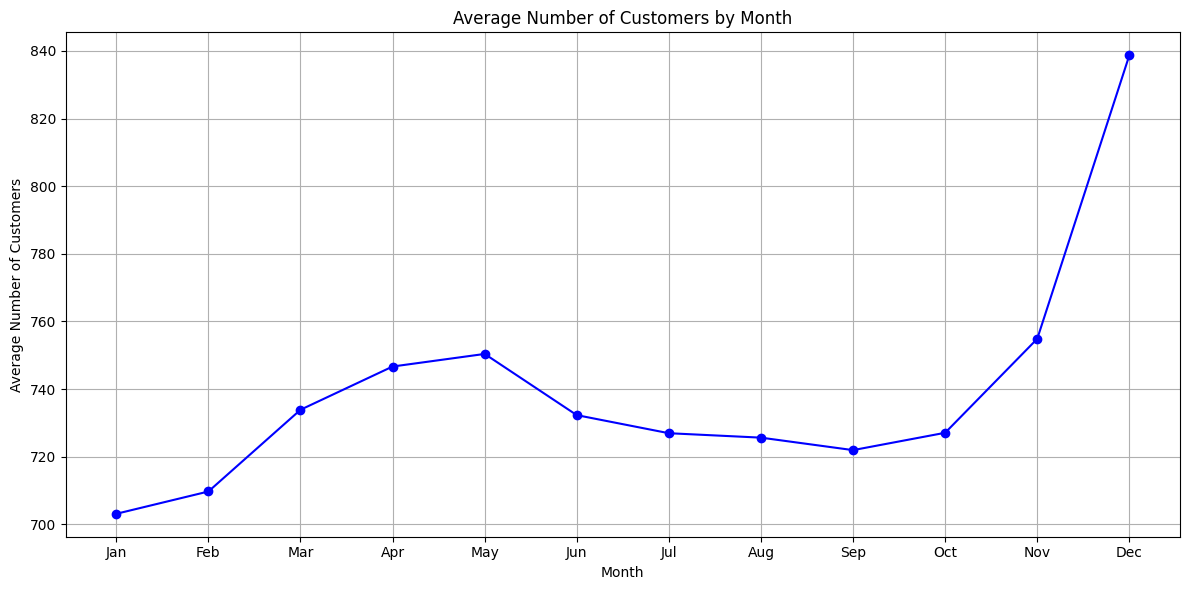

In [64]:

train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Month'] = train_data['Date'].dt.month
open_data = train_data[train_data['Open'] == 1]
monthly_customers = open_data.groupby('Month')['Customers'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_customers.index, monthly_customers.values, marker='o', linestyle='-', color='b')
plt.title('Average Number of Customers by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Customers')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names
plt.grid(True)
plt.tight_layout()
plt.show()



#### Customer behavior during store not open

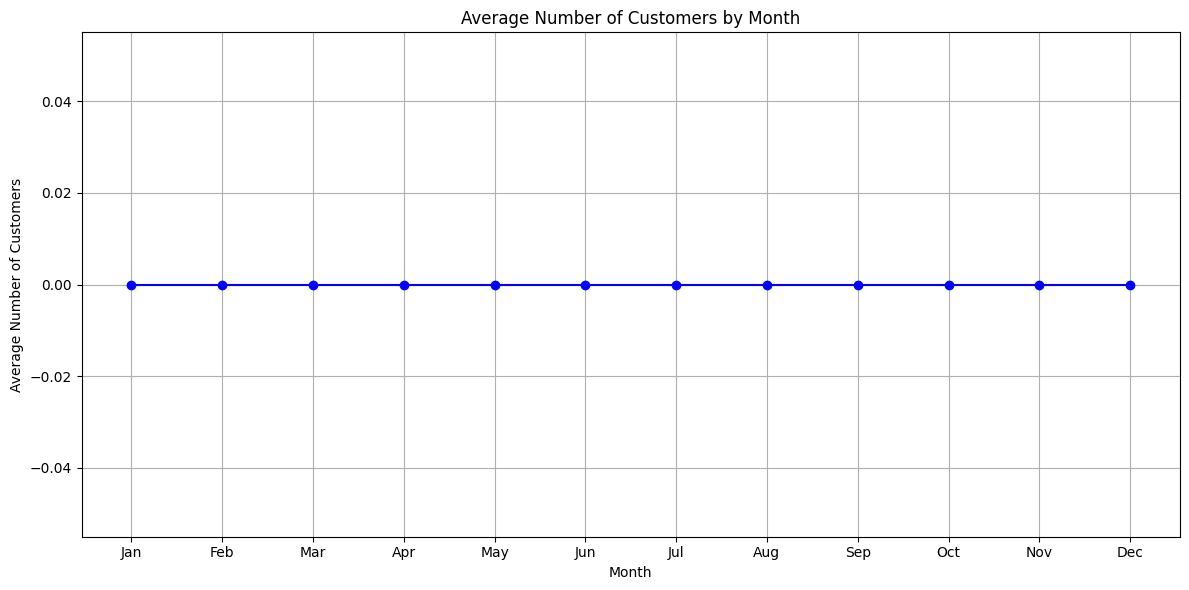

In [65]:

train_data['Date'] = pd.to_datetime(train_data['Date'])


train_data['Month'] = train_data['Date'].dt.month

open_data = train_data[train_data['Open'] == 0]

monthly_customers = open_data.groupby('Month')['Customers'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_customers.index, monthly_customers.values, marker='o', linestyle='-', color='b')
plt.title('Average Number of Customers by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Customers')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Month names
plt.grid(True)
plt.tight_layout()
plt.show()


#### Customer behavior during store open seasonal

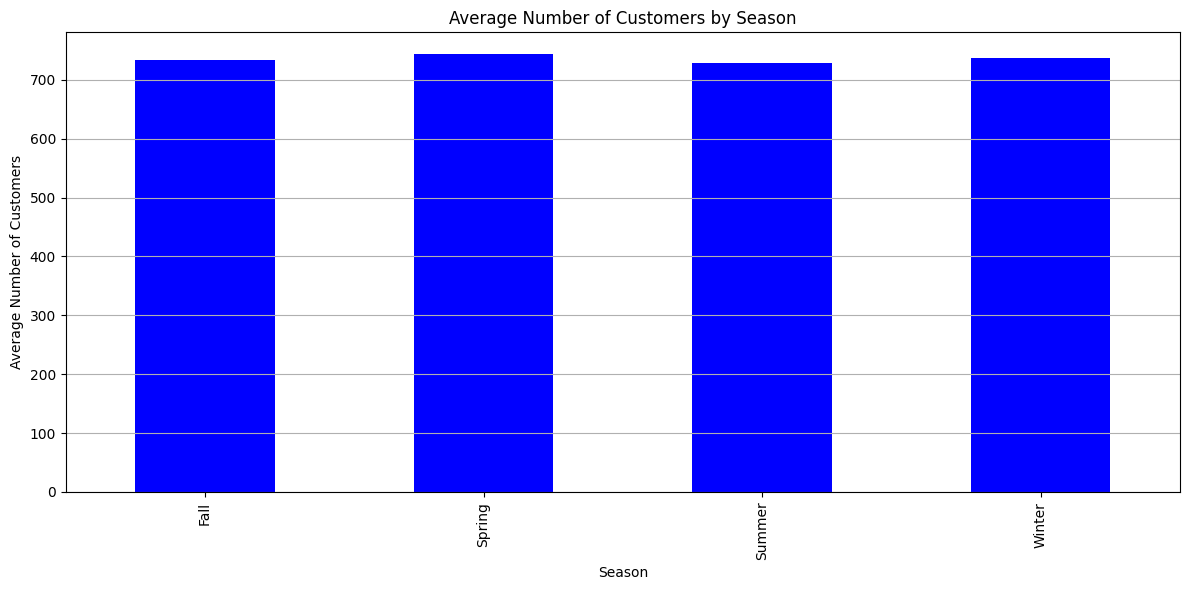

In [66]:

def categorize_month(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

train_data['Season'] = train_data['Month'].apply(categorize_month)

# Filter to include only open stores
open_data = train_data[train_data['Open'] == 1]

# Group by season and calculate average number of customers
seasonal_customers = open_data.groupby('Season')['Customers'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
seasonal_customers.plot(kind='bar', color='b')
plt.title('Average Number of Customers by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Customers')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Distribution of State Holiday

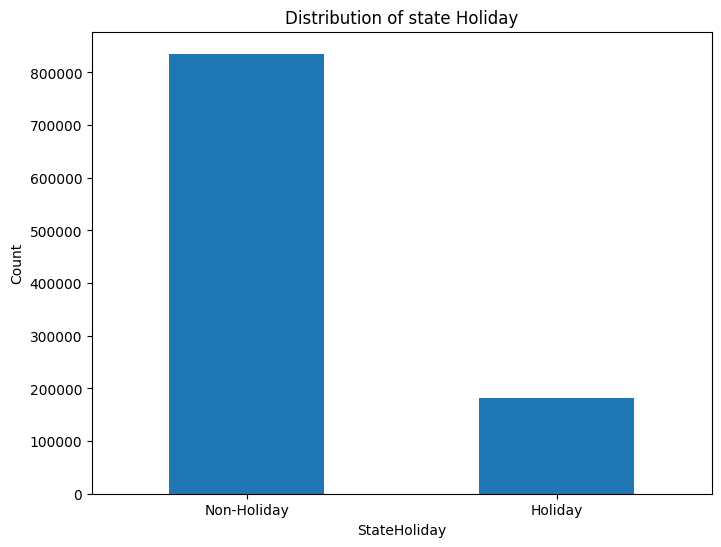

In [95]:
plt.figure(figsize=(8, 6))
merged_train_data_store['StateHoliday'].value_counts().plot(kind='bar')
plt.title('Distribution of state Holiday')
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


### Distribution of School Holiday

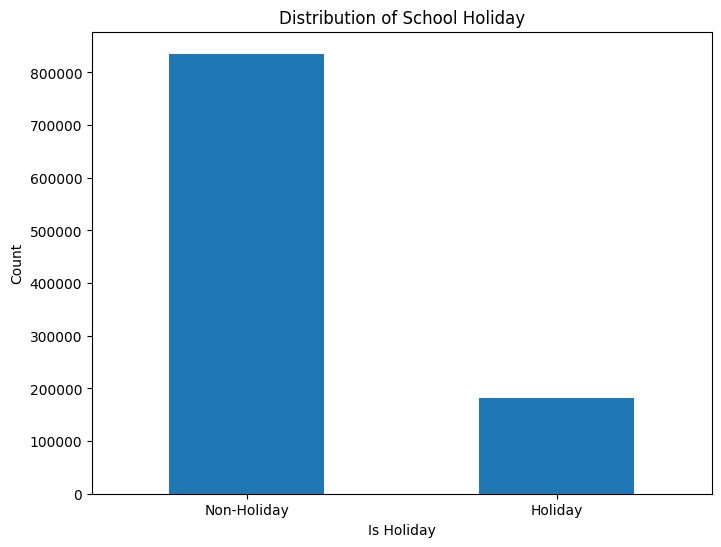

In [96]:
plt.figure(figsize=(8, 6))
merged_train_data_store['SchoolHoliday'].value_counts().plot(kind='bar')
plt.title('Distribution of School Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


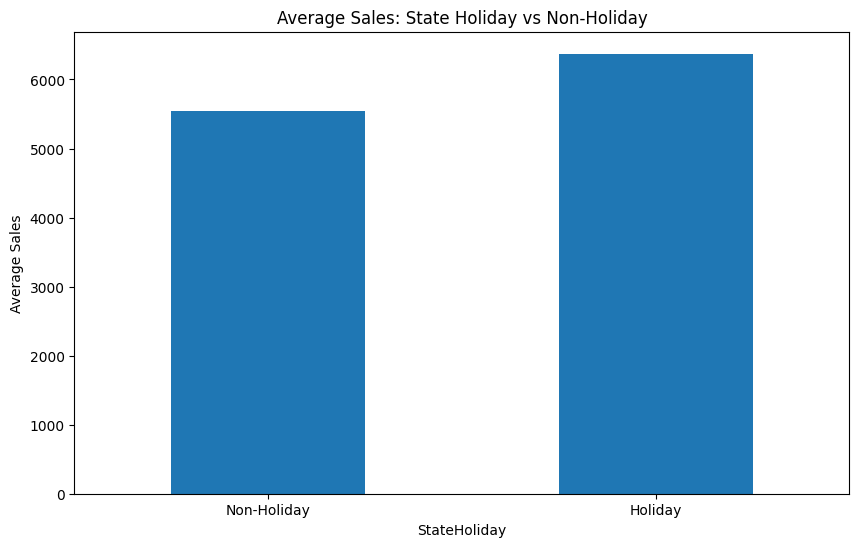

In [97]:
holiday_effect = merged_train_data_store.groupby('StateHoliday')['Sales'].mean()
holiday_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales: State Holiday vs Non-Holiday')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


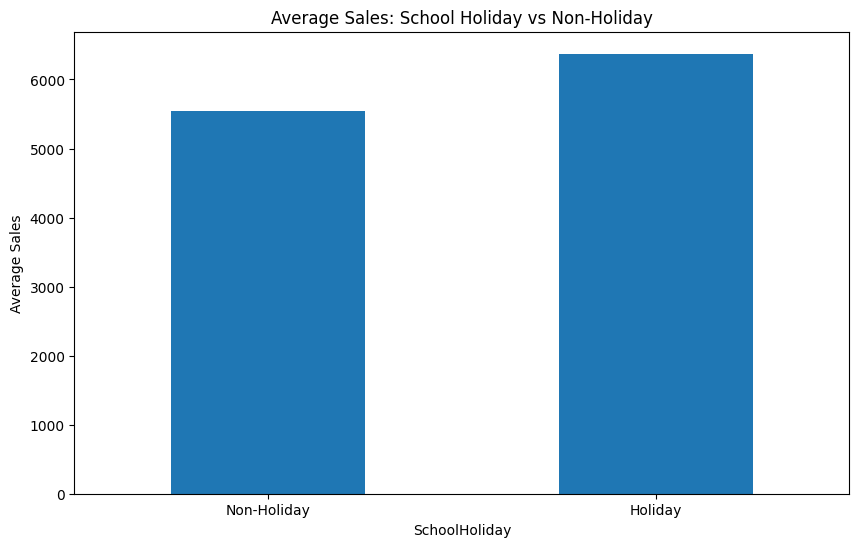

In [98]:
holiday_effect = merged_train_data_store.groupby('SchoolHoliday')['Sales'].mean()
holiday_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales: School Holiday vs Non-Holiday')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


### State holiday equal to school holiday

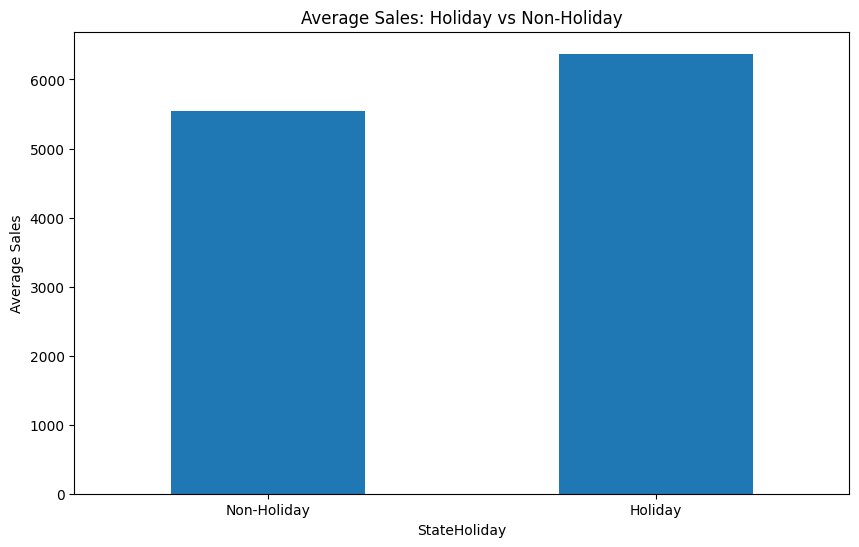

In [99]:
merged_train_data_store['StateHoliday'] = merged_train_data_store['SchoolHoliday']
holiday_effect = merged_train_data_store.groupby('StateHoliday')['Sales'].mean()
holiday_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


### Promotion effect over time

In [72]:
monthly_promo_sales = merged_train_data_store.groupby([merged_train_data_store.index.to_period('M'), 'Promo'])['Sales'].mean().unstack()


In [73]:
monthly_promo_sales.head()


Promo,0,1
Date,,
2013-01,4117.199154,7358.728161
2013-02,4301.514674,7466.948475
2013-03,4071.467881,7487.588191
2013-04,4027.505531,7509.977653
2013-05,4067.865695,6978.308244


## promo affect sales

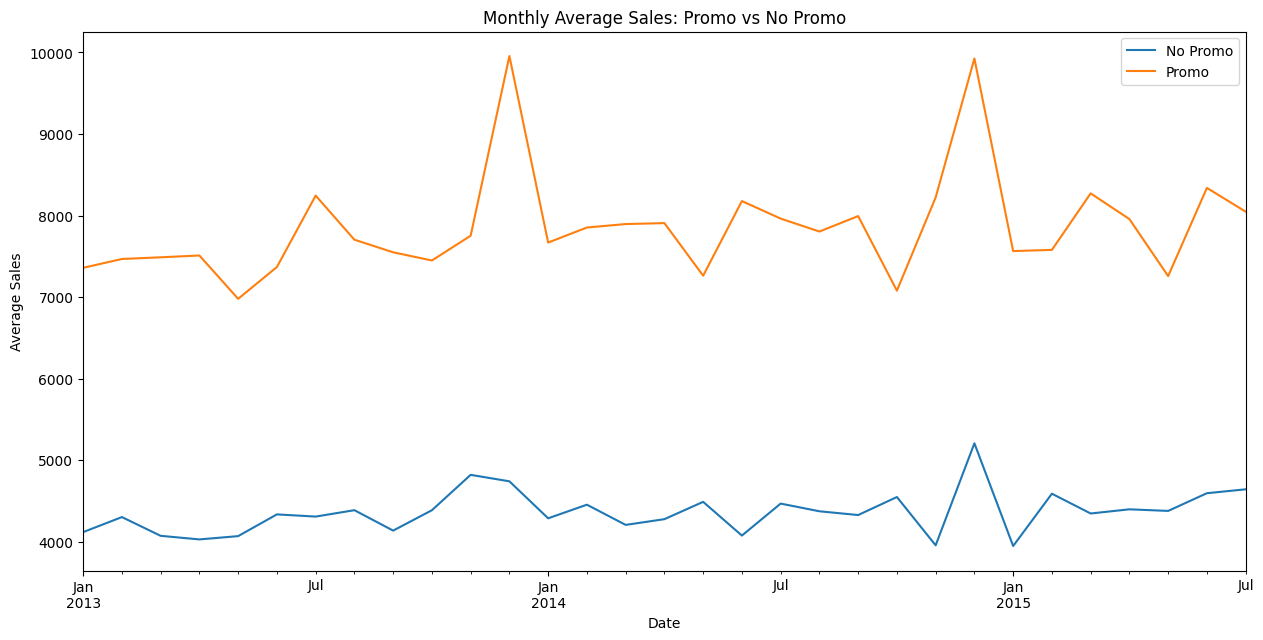

In [74]:
monthly_promo_sales[[0, 1]].plot(figsize=(15, 7))
plt.title('Monthly Average Sales: Promo vs No Promo')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(['No Promo', 'Promo'])
plt.show()


In [75]:
merged_train_data_store.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,4,5263.0,555,1,1,1,1,c,basic,1270.0,9.0,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",31,7,2015
2015-07-31,2,4,6064.0,625,1,1,1,1,a,basic,570.0,11.0,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct",31,7,2015
2015-07-31,3,4,8314.0,821,1,1,1,1,a,basic,14130.0,12.0,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct",31,7,2015
2015-07-31,4,4,13995.0,1485,1,1,1,1,c,extended,620.0,9.0,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",31,7,2015
2015-07-31,5,4,4822.0,559,1,1,1,1,a,basic,16107.5,4.0,2015.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",31,7,2015


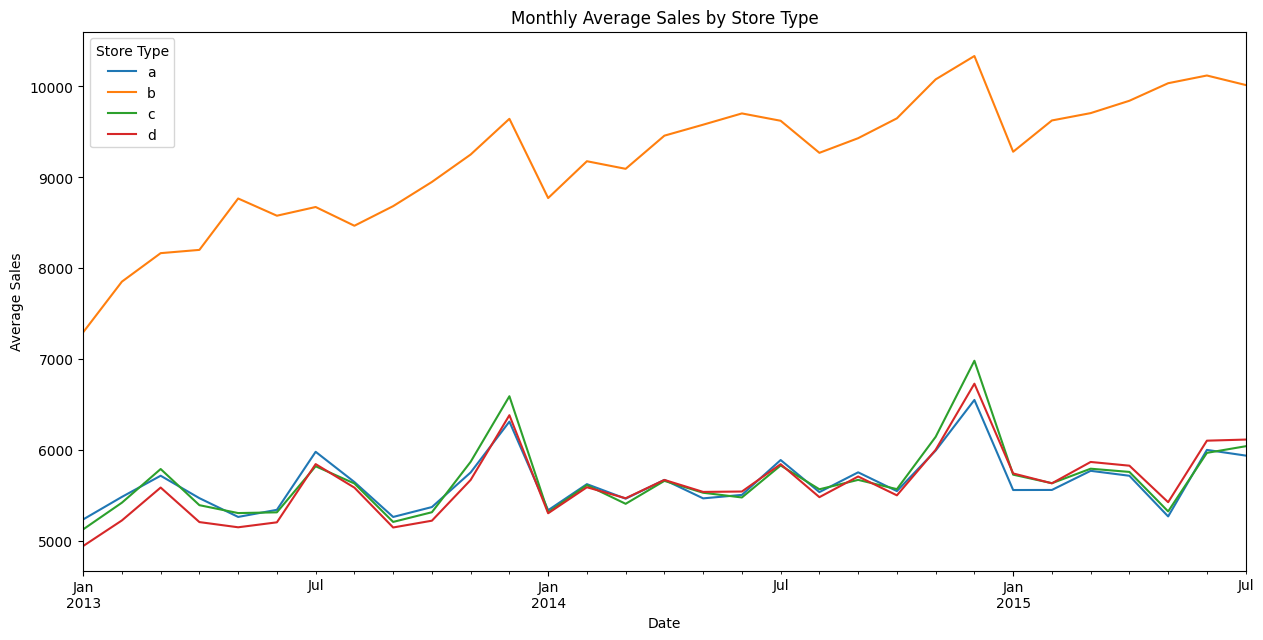

In [76]:
# 10. Store type performance over time
store_type_sales = merged_train_data_store.groupby([merged_train_data_store.index.to_period('M'), 'StoreType'])['Sales'].mean().unstack()
store_type_sales.plot(figsize=(15, 7))
plt.title('Monthly Average Sales by Store Type')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(title='Store Type')
plt.show()


In [77]:
store_type_sales.head()


StoreType,a,b,c,d
Date,,,,
2013-01,5237.220513,7294.836812,5127.998692,4944.986188
2013-02,5485.177771,7852.097689,5421.533784,5226.322250
2013-03,5717.865556,8165.326376,5791.676765,5587.945171
2013-04,5471.197342,8201.215686,5394.063288,5208.185057
2013-05,5264.910353,8766.324478,5307.313753,5151.008250


In [78]:
merged_store_type_prome = pd.merge(monthly_promo_sales, store_type_sales, on='Date', how='inner')


In [79]:
merged_store_type_prome.head()


,0,1,a,b,c,d
Date,,,,,,
2013-01,4117.199154,7358.728161,5237.220513,7294.836812,5127.998692,4944.986188
2013-02,4301.514674,7466.948475,5485.177771,7852.097689,5421.533784,5226.322250
2013-03,4071.467881,7487.588191,5717.865556,8165.326376,5791.676765,5587.945171
2013-04,4027.505531,7509.977653,5471.197342,8201.215686,5394.063288,5208.185057
2013-05,4067.865695,6978.308244,5264.910353,8766.324478,5307.313753,5151.008250


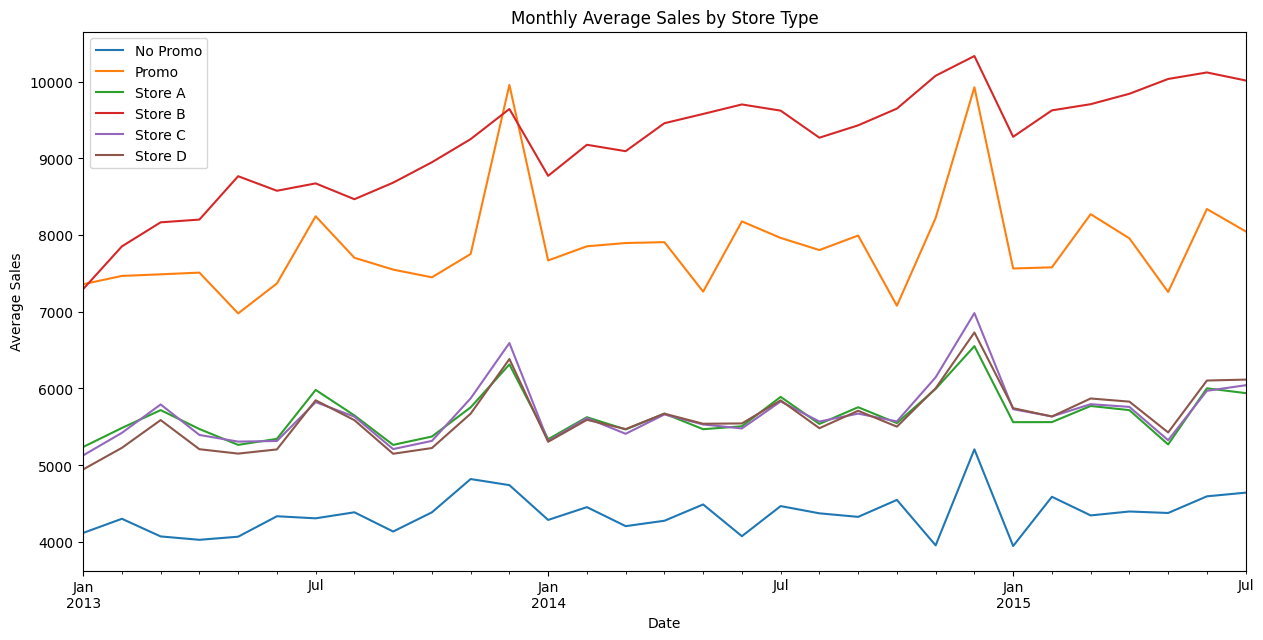

In [80]:
merged_store_type_prome.plot(figsize=(15, 7))
plt.title('Monthly Average Sales by Store Type')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(title='Store Type')
plt.legend(['No Promo', 'Promo','Store A', 'Store B', 'Store C', 'Store D'])

plt.show()


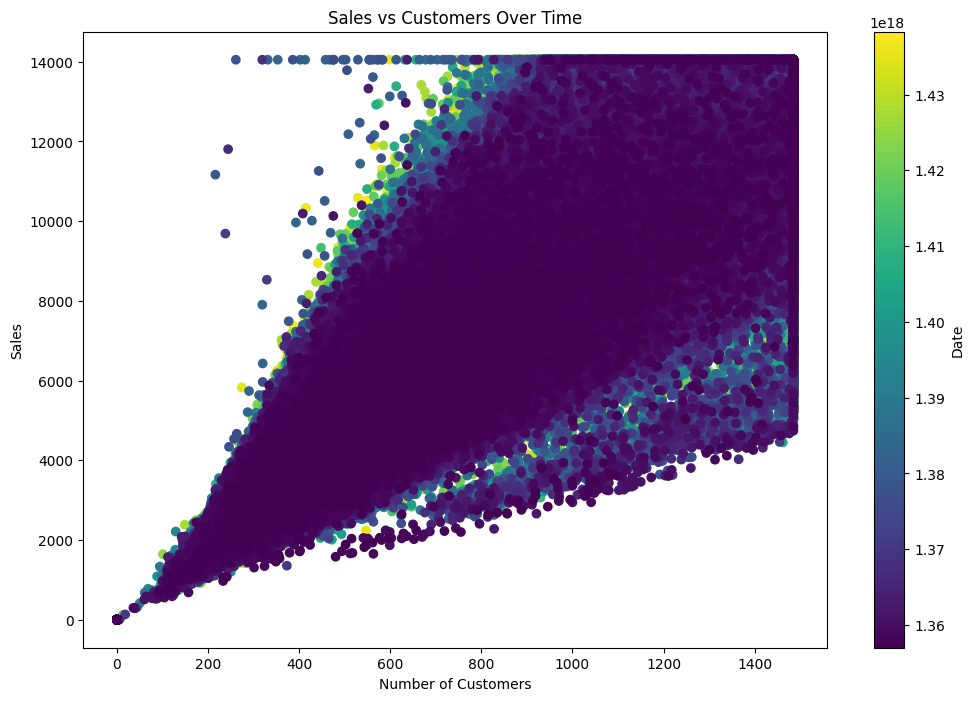

In [81]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(merged_train_data_store['Customers'], merged_train_data_store['Sales'], c=merged_train_data_store.index, cmap='viridis')
plt.colorbar(scatter, label='Date')
plt.title('Sales vs Customers Over Time')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


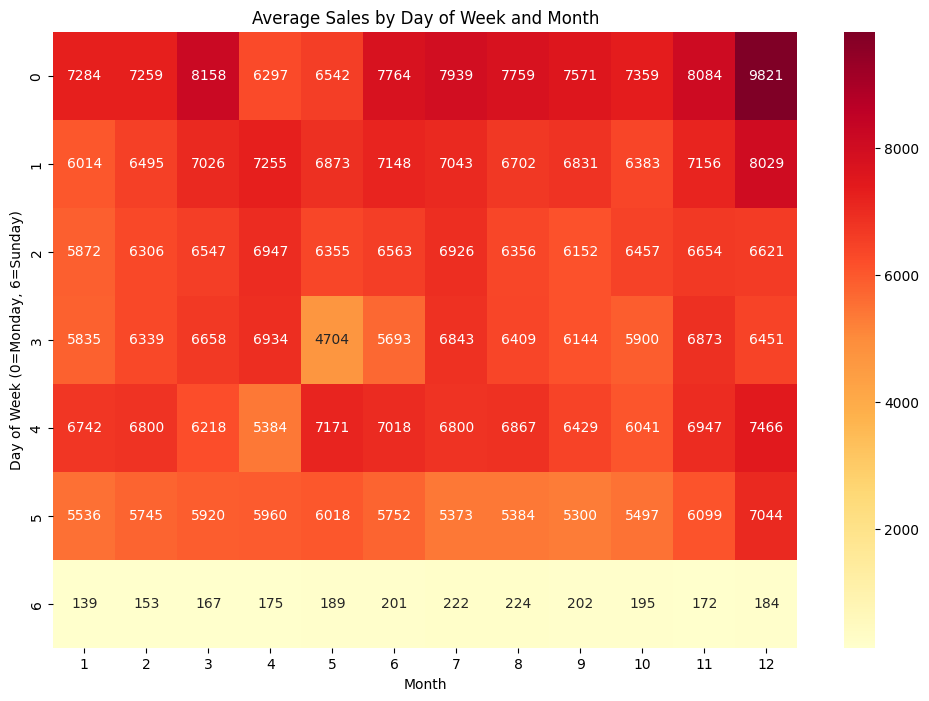

In [82]:
merged_train_data_store['DayOfWeek'] = merged_train_data_store.index.dayofweek
merged_train_data_store['Month'] = merged_train_data_store.index.month
sales_heatmap = merged_train_data_store.pivot_table(values='Sales', index='DayOfWeek', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Sales by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.show()


### Sales growth rate

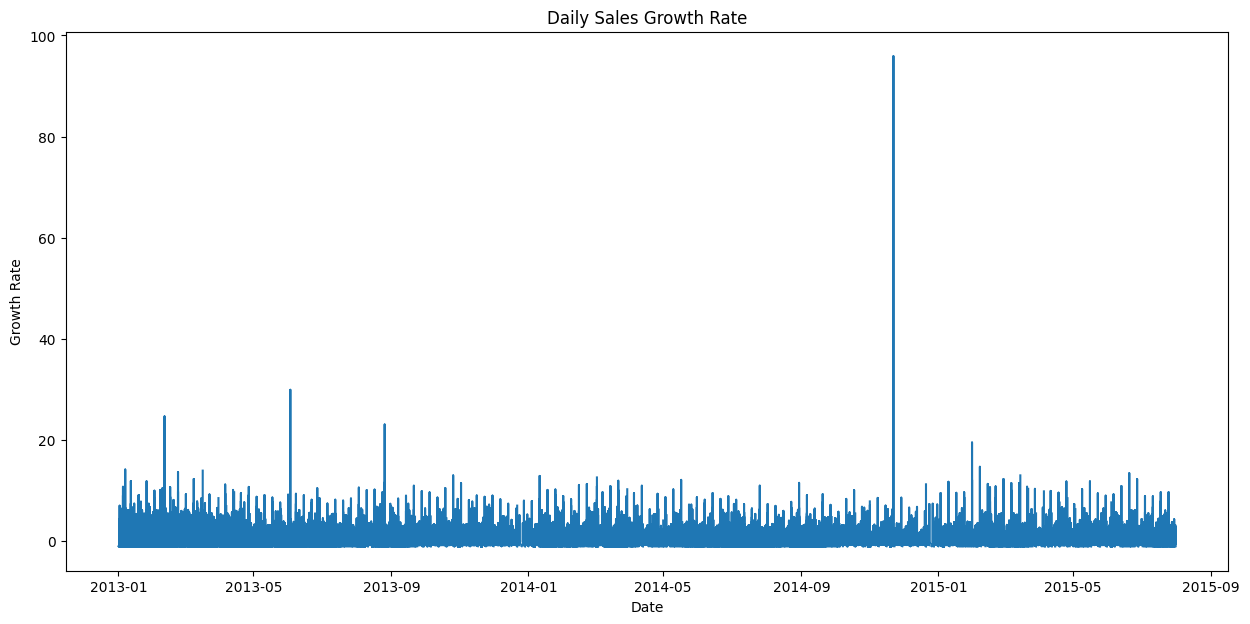

In [83]:
merged_train_data_store['SalesGrowthRate'] = merged_train_data_store['Sales'].pct_change()
plt.figure(figsize=(15, 7))
plt.plot(merged_train_data_store.index, merged_train_data_store['SalesGrowthRate'])
plt.title('Daily Sales Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.show()


In [84]:
monthly_effect_assortment_type = merged_train_data_store.groupby([merged_train_data_store.index.to_period('M'), 'Assortment'])['Sales'].mean().unstack()


### How the assortment type affects sales

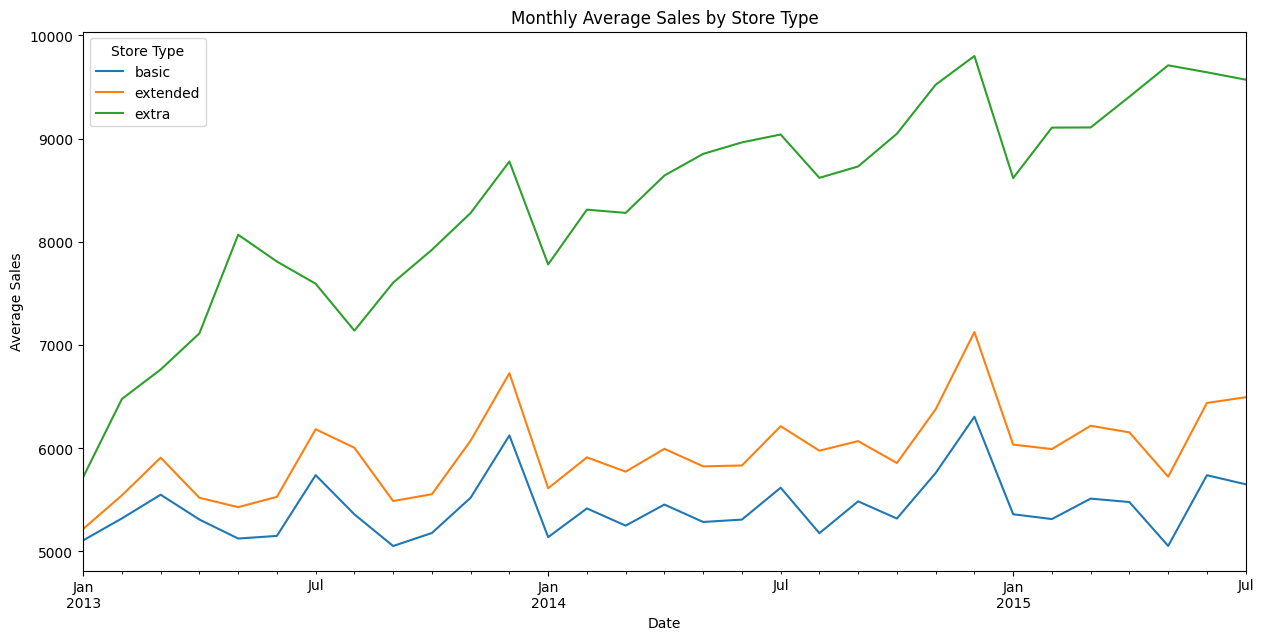

In [85]:
monthly_effect_assortment_type.plot(figsize=(15, 7))
plt.title('Monthly Average Sales by Store Type')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(title='Store Type')
plt.show()


In [86]:
competitor_affect_sales=merged_train_data_store.groupby('CompetitionDistance')['Sales'].mean()


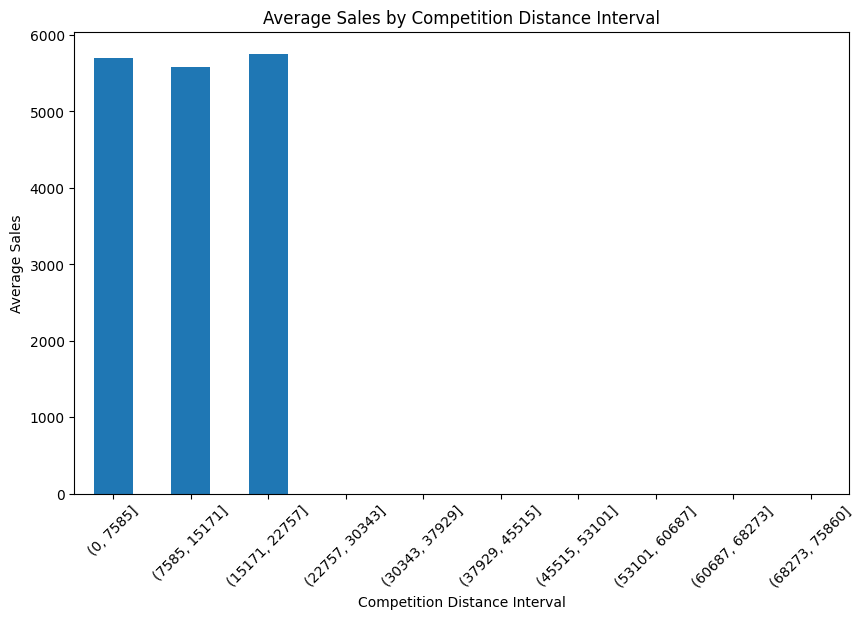

In [94]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the desired interval boundaries
intervals = [0, 7585, 15171, 22757, 30343, 37929, 45515, 53101, 60687, 68273, 75860]

# Create a new column for the intervals
merged_train_data_store['CompetitionDistanceInterval'] = pd.cut(merged_train_data_store['CompetitionDistance'], bins=intervals)

# Group by the interval and calculate mean sales
interval_sales = merged_train_data_store.groupby('CompetitionDistanceInterval')['Sales'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
interval_sales.plot(kind='bar')
plt.title('Average Sales by Competition Distance Interval')
plt.xlabel('Competition Distance Interval')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


In [88]:
merged_train_data_store.reset_index(inplace=True)


In [89]:
merged_train_data_store.head()


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,SalesGrowthRate,CompetitionDistanceInterval
0,2015-07-31,1,4,5263.0,555,1,1,1,1,c,...,2008.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",31,7,2015,NaN,"(0, 7585]"
1,2015-07-31,2,4,6064.0,625,1,1,1,1,a,...,2007.0,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct",31,7,2015,0.152195,"(0, 7585]"
2,2015-07-31,3,4,8314.0,821,1,1,1,1,a,...,2006.0,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct",31,7,2015,0.371042,"(7585, 15171]"
3,2015-07-31,4,4,13995.0,1485,1,1,1,1,c,...,2009.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",31,7,2015,0.683305,"(0, 7585]"
4,2015-07-31,5,4,4822.0,559,1,1,1,1,a,...,2015.0,0,23.595447,2011.763573,"Jan,Apr,Jul,Oct",31,7,2015,-0.655448,"(15171, 22757]"


### Stores open on all weekdays

In [90]:

merged_train_data_store['Date'] = pd.to_datetime(merged_train_data_store['Date'])

# Filter for open stores
open_data = merged_train_data_store[merged_train_data_store['Open'] == 1]

# Step 1: Filter for weekdays (DayOfWeek from 0 to 4 is Monday to Friday)
weekday_open_data = open_data[open_data['DayOfWeek'].isin([0, 1, 2, 3, 4])]

# Step 2: Group by Store and StoreType, count unique weekdays each store is open
stores_open_days = weekday_open_data.groupby(['Store', 'StoreType'])['DayOfWeek'].nunique().reset_index()

# Step 3: Identify stores open all weekdays (5 unique weekdays)
stores_open_days['IsOpenAllWeekdays'] = stores_open_days['DayOfWeek'] == 5

# Step 4: Separate stores that are open all weekdays and those that are not
stores_open_all_weekdays = stores_open_days[stores_open_days['IsOpenAllWeekdays'] == True]
stores_not_open_all_weekdays = stores_open_days[stores_open_days['IsOpenAllWeekdays'] == False]

# Step 5: Group by StoreType to summarize results
open_all_weekdays_by_type = stores_open_all_weekdays.groupby('StoreType').size()
not_open_all_weekdays_by_type = stores_not_open_all_weekdays.groupby('StoreType').size()

# Step 6: Display results
print("Stores Open on All Weekdays by StoreType:")
print(open_all_weekdays_by_type)

print("\nStores NOT Open on All Weekdays by StoreType:")
print(not_open_all_weekdays_by_type)


Stores Open on All Weekdays by StoreType:
StoreType
a    602
b     17
c    148
d    348
dtype: int64

Stores NOT Open on All Weekdays by StoreType:
Series([], dtype: int64)


### All store open in all weekdays

<Figure size 1200x600 with 0 Axes>

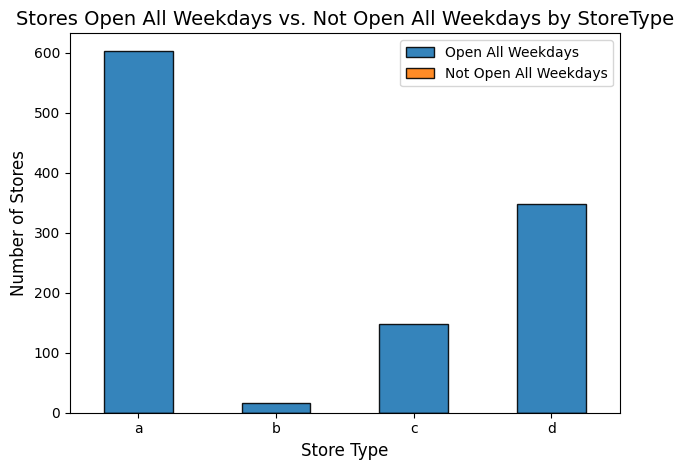

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

open_weekday_summary = pd.DataFrame({
    'OpenAllWeekdays': open_all_weekdays_by_type,
    'NotOpenAllWeekdays': not_open_all_weekdays_by_type
}).fillna(0) 
open_weekday_summary = open_weekday_summary.reset_index()

plt.figure(figsize=(12, 6))

open_weekday_summary.set_index('StoreType')[['OpenAllWeekdays', 'NotOpenAllWeekdays']].plot(
    kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], alpha=0.9, edgecolor='k')

plt.title('Stores Open All Weekdays vs. Not Open All Weekdays by StoreType', fontsize=14)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Open All Weekdays', 'Not Open All Weekdays'], loc='upper right')
plt.tight_layout()

# Show plot
plt.show()


### How does that affect their sales on weekends


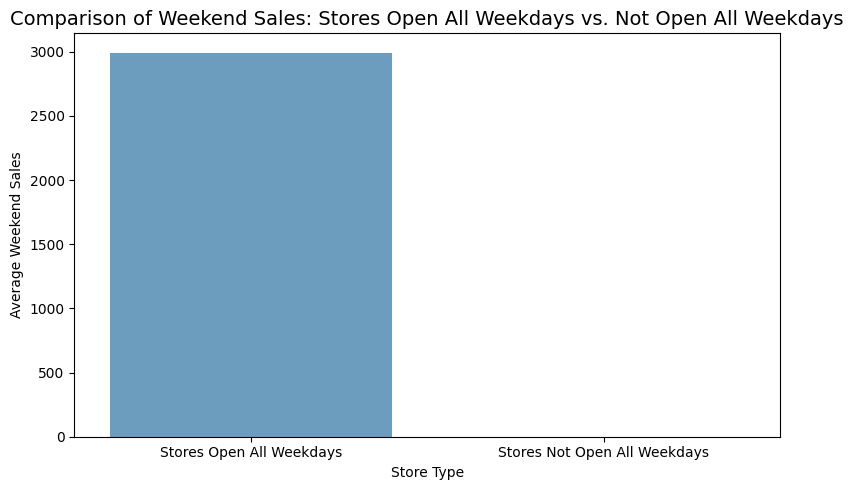

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

open_data = merged_train_data_store[merged_train_data_store['Open'] == 1]
weekday_data = open_data[open_data['DayOfWeek'].isin([0, 1, 2, 3, 4])]  
stores_open_weekdays = weekday_data.groupby('Store')['DayOfWeek'].nunique()
stores_open_all_weekdays = stores_open_weekdays[stores_open_weekdays == 5].index

weekend_data = merged_train_data_store[merged_train_data_store['DayOfWeek'].isin([5, 6])]  
weekend_sales_open_all_weekdays = weekend_data[weekend_data['Store'].isin(stores_open_all_weekdays)].groupby('Store')['Sales'].mean()
weekend_sales_not_open_all_weekdays = weekend_data[~weekend_data['Store'].isin(stores_open_all_weekdays)].groupby('Store')['Sales'].mean()
comparison_df = pd.DataFrame({
    'Stores Open All Weekdays': [weekend_sales_open_all_weekdays.mean()],
    'Stores Not Open All Weekdays': [weekend_sales_not_open_all_weekdays.mean()]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, palette='Blues_d')
plt.title('Comparison of Weekend Sales: Stores Open All Weekdays vs. Not Open All Weekdays', fontsize=14)
plt.ylabel('Average Weekend Sales')
plt.xlabel('Store Type')
plt.tight_layout()
plt.show()
